### Importación de datos



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [7]:
def ingreso_tienda(tienda, numero_tienda):
  ingreso_tienda = tienda['Precio'].sum()
  print(f"Ingreso Tienda {numero_tienda}: ${ingreso_tienda:,.2f}")

ingreso_tienda(tienda1, 1)
ingreso_tienda(tienda2, 2)
ingreso_tienda(tienda3, 3)
ingreso_tienda(tienda4, 4)

Ingreso Tienda 1: $1,150,880,400.00
Ingreso Tienda 2: $1,116,343,500.00
Ingreso Tienda 3: $1,098,019,600.00
Ingreso Tienda 4: $1,038,375,700.00


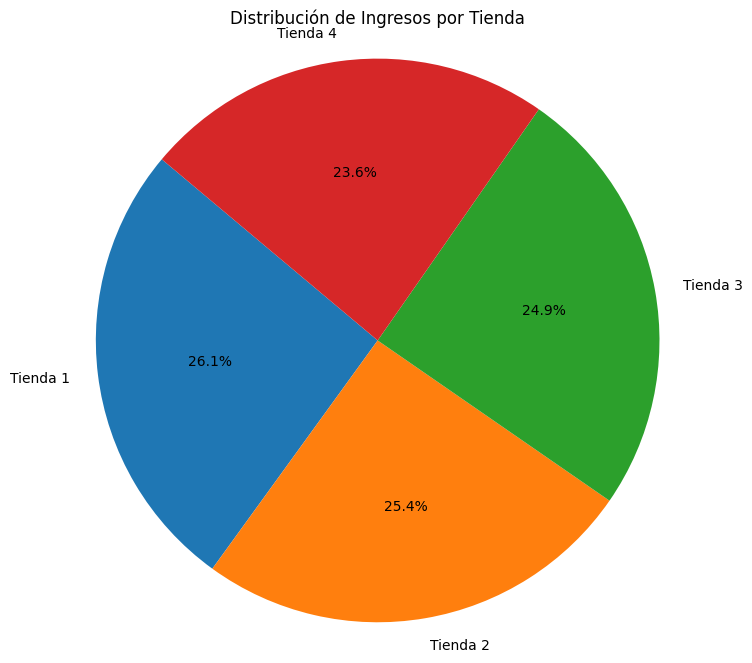

In [38]:
import matplotlib.pyplot as plt

# Datos de ingresos por tienda
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
plt.pie(ingresos, labels=tiendas, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ingresos por Tienda')
plt.axis('equal')  # Para asegurar que el pastel sea un círculo.
plt.show()

# 2. Ventas por categoría

In [36]:
def ventas_por_categoria(tienda, numero_tienda):
  ventas_por_categoria = tienda.groupby('Categoría del Producto')['Categoría del Producto'].count().sort_values(ascending=False)
  print(f"--- Tienda {numero_tienda} ---")
  print(ventas_por_categoria.head(3))

ventas_por_categoria(tienda1, 1)
ventas_por_categoria(tienda2, 2)
ventas_por_categoria(tienda3, 3)
ventas_por_categoria(tienda4, 4)

--- Tienda 1 ---
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: Categoría del Producto, dtype: int64
--- Tienda 2 ---
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: Categoría del Producto, dtype: int64
--- Tienda 3 ---
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: Categoría del Producto, dtype: int64
--- Tienda 4 ---
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: Categoría del Producto, dtype: int64


# 3. Calificación promedio de la tienda


In [31]:
def calificaciones_clientes(tienda, numero_tienda):
  calificaciones_clientes = tienda['Calificación'].mean()
  print(f"Calificación promedio de la Tienda {numero_tienda}: {calificaciones_clientes:,.2f}")

calificaciones_clientes(tienda1, 1)
calificaciones_clientes(tienda2, 2)
calificaciones_clientes(tienda3, 3)
calificaciones_clientes(tienda4, 4)

Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


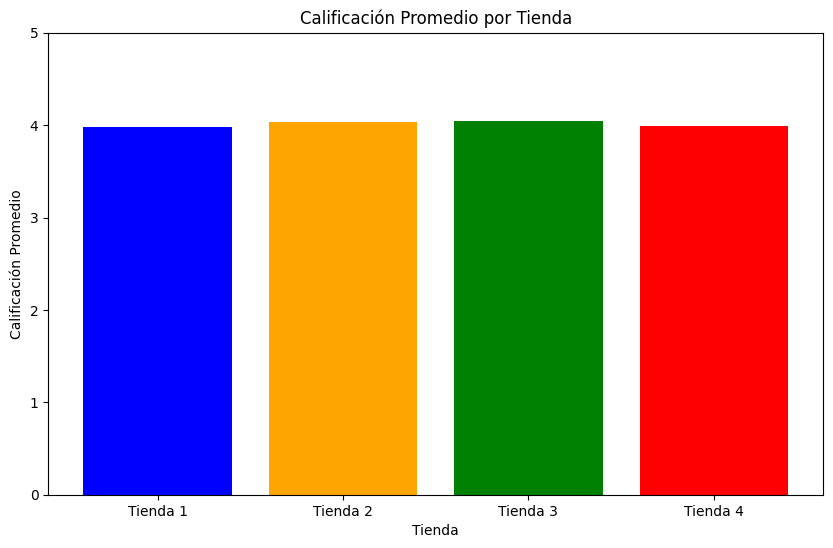

In [39]:
import matplotlib.pyplot as plt

# Datos de calificaciones promedio por tienda
calificaciones = [tienda1['Calificación'].mean(), tienda2['Calificación'].mean(), tienda3['Calificación'].mean(), tienda4['Calificación'].mean()]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(tiendas, calificaciones, color=['blue', 'orange', 'green', 'red'])
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)  # Establecer el límite del eje y de 0 a 5
plt.show()

# 4. Productos más y menos vendidos

In [37]:
def productos_mas_y_menos_vendidos(tienda, numero_tienda):
  print(f"--- Tienda {numero_tienda} ---")
  productos_vendidos = tienda['Producto'].value_counts().sort_values(ascending=False)
  print("Producto más vendido:")
  print(productos_vendidos.head(3))
  print("\nProducto menos vendido:")
  print(productos_vendidos.tail(3))
  print("\n")

productos_mas_y_menos_vendidos(tienda1, 1)
productos_mas_y_menos_vendidos(tienda2, 2)
productos_mas_y_menos_vendidos(tienda3, 3)
productos_mas_y_menos_vendidos(tienda4, 4)

--- Tienda 1 ---
Producto más vendido:
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64

Producto menos vendido:
Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64


--- Tienda 2 ---
Producto más vendido:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64

Producto menos vendido:
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


--- Tienda 3 ---
Producto más vendido:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64

Producto menos vendido:
Producto
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


--- Tienda 4 ---
Producto más vendido:
Producto
Cama box                   62
Cubertería                 59
Dashboards

# 5. Envío promedio por tienda

In [33]:
def gasto_envio_promedio(tienda, numero_tienda):
  gasto_envio_promedio = tienda['Costo de envío'].mean()
  print(f"Gasto de envío promedio de la Tienda {numero_tienda}: ${gasto_envio_promedio:,.2f}")

gasto_envio_promedio(tienda1, 1)
gasto_envio_promedio(tienda2, 2)
gasto_envio_promedio(tienda3, 3)
gasto_envio_promedio(tienda4, 4)

Gasto de envío promedio de la Tienda 1: $26,018.61
Gasto de envío promedio de la Tienda 2: $25,216.24
Gasto de envío promedio de la Tienda 3: $24,805.68
Gasto de envío promedio de la Tienda 4: $23,459.46


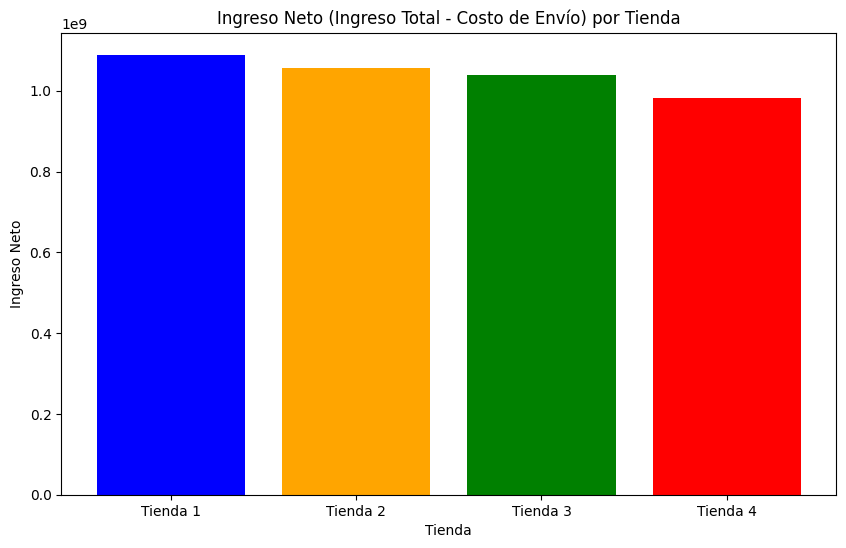

In [40]:
import matplotlib.pyplot as plt

# Calcular el ingreso neto para cada tienda
ingreso_neto1 = tienda1['Precio'].sum() - tienda1['Costo de envío'].sum()
ingreso_neto2 = tienda2['Precio'].sum() - tienda2['Costo de envío'].sum()
ingreso_neto3 = tienda3['Precio'].sum() - tienda3['Costo de envío'].sum()
ingreso_neto4 = tienda4['Precio'].sum() - tienda4['Costo de envío'].sum()

# Datos para la gráfica
ingresos_netos = [ingreso_neto1, ingreso_neto2, ingreso_neto3, ingreso_neto4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(tiendas, ingresos_netos, color=['blue', 'orange', 'green', 'red'])
plt.title('Ingreso Neto (Ingreso Total - Costo de Envío) por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Neto')
plt.show()

# Conclusiones del Análisis

Basado en los análisis realizados, podemos extraer las siguientes conclusiones sobre el desempeño de las cuatro tiendas:

*   **Tienda 1:** A pesar de ser la tienda con **mayores ingresos**, presenta la **peor calificación promedio** por parte de los clientes y el **costo de envío más elevado**. Esto sugiere que, aunque vende productos de mayor valor, la experiencia del cliente podría estar viéndose afectada negativamente.

*   **Tienda 4:** Aunque es la tienda con **menores ingresos**, tiene el **costo de envío más bajo** y una **calificación promedio aceptable**. Esto podría indicar una estrategia de precios más competitiva o una mayor eficiencia en la logística, lo que resulta en una mejor percepción por parte de los clientes en cuanto a costos.

*   **Tiendas 2 y 3:** Ambas tiendas presentan un desempeño equilibrado, con **buenas calificaciones promedio** y niveles de ingresos y costos de envío intermedios. La **Tienda 3 destaca por tener la mejor calificación** entre las cuatro.

*   **Categorías más vendidas:** En general, las categorías de **Muebles y Electrónicos** son las más populares en todas las tiendas, lo que indica una alta demanda de estos productos en el mercado.

Este análisis sugiere que hay áreas de oportunidad para cada tienda. Por ejemplo, la Tienda 1 podría enfocarse en mejorar la satisfacción del cliente y optimizar sus costos de envío, mientras que la Tienda 4 podría explorar estrategias para aumentar su volumen de ventas o el valor promedio de las compras.


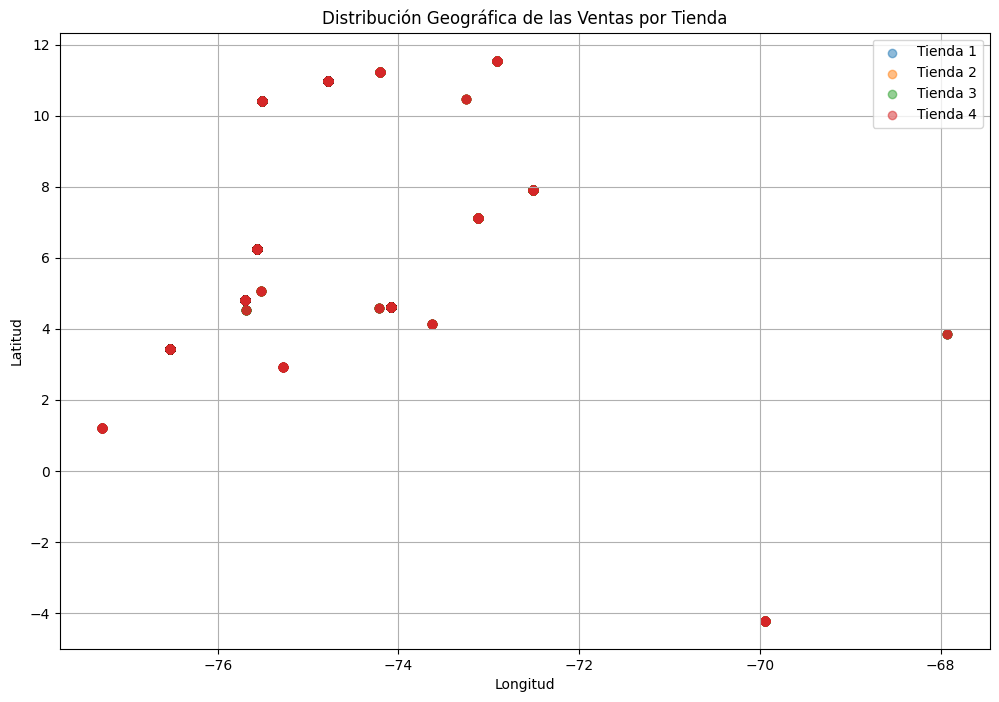

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Graficar las ventas de cada tienda con un color diferente
plt.scatter(tienda1['lon'], tienda1['lat'], alpha=0.5, label='Tienda 1')
plt.scatter(tienda2['lon'], tienda2['lat'], alpha=0.5, label='Tienda 2')
plt.scatter(tienda3['lon'], tienda3['lat'], alpha=0.5, label='Tienda 3')
plt.scatter(tienda4['lon'], tienda4['lat'], alpha=0.5, label='Tienda 4')

plt.title('Distribución Geográfica de las Ventas por Tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.show()

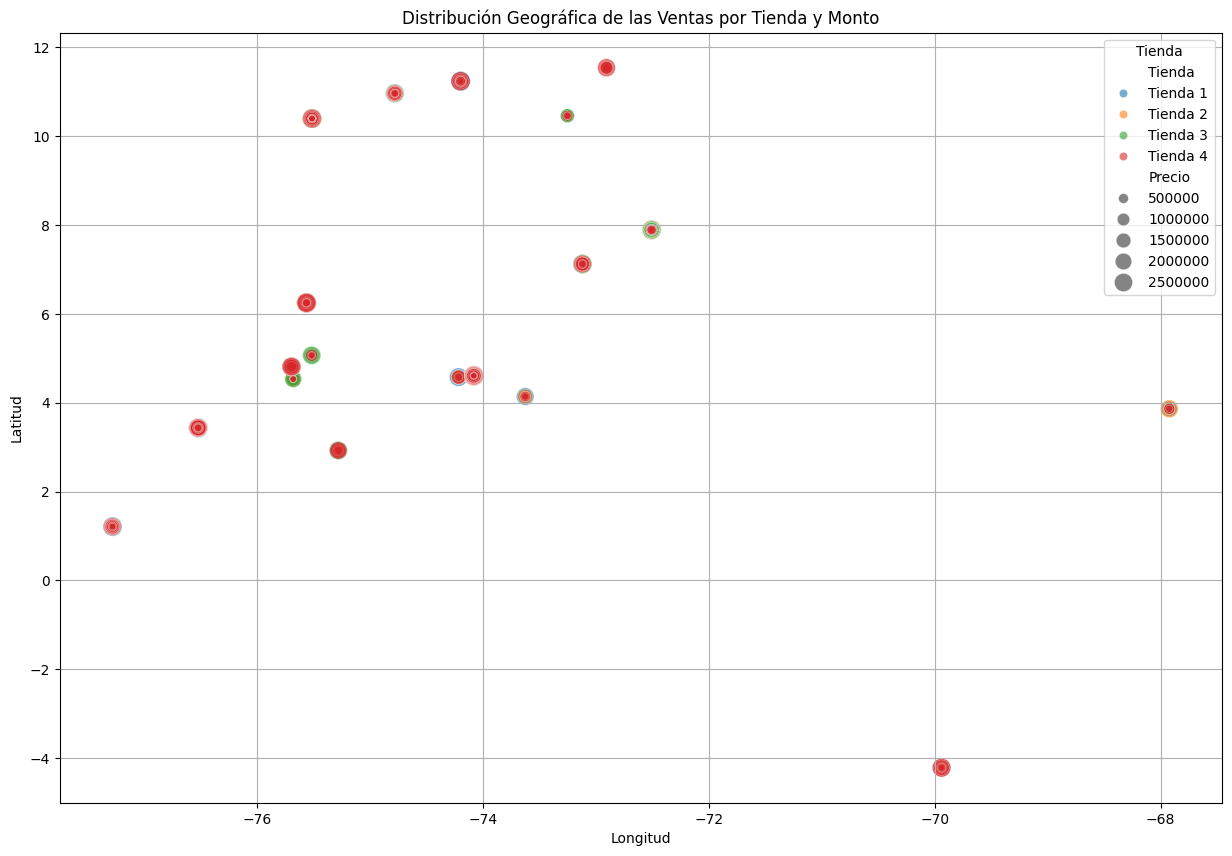

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Primero, vamos a añadir una columna 'Tienda' a cada dataframe para poder identificarlos
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Ahora, concatenamos todos los dataframes en uno solo
tiendas_unidas = pd.concat([tienda1, tienda2, tienda3, tienda4])

# Crear la gráfica de dispersión con seaborn
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=tiendas_unidas,
    x='lon',
    y='lat',
    hue='Tienda',  # Color por tienda
    size='Precio',  # Tamaño por precio
    sizes=(20, 200),
    alpha=0.6
)

plt.title('Distribución Geográfica de las Ventas por Tienda y Monto')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Tienda')
plt.grid(True)
plt.show()

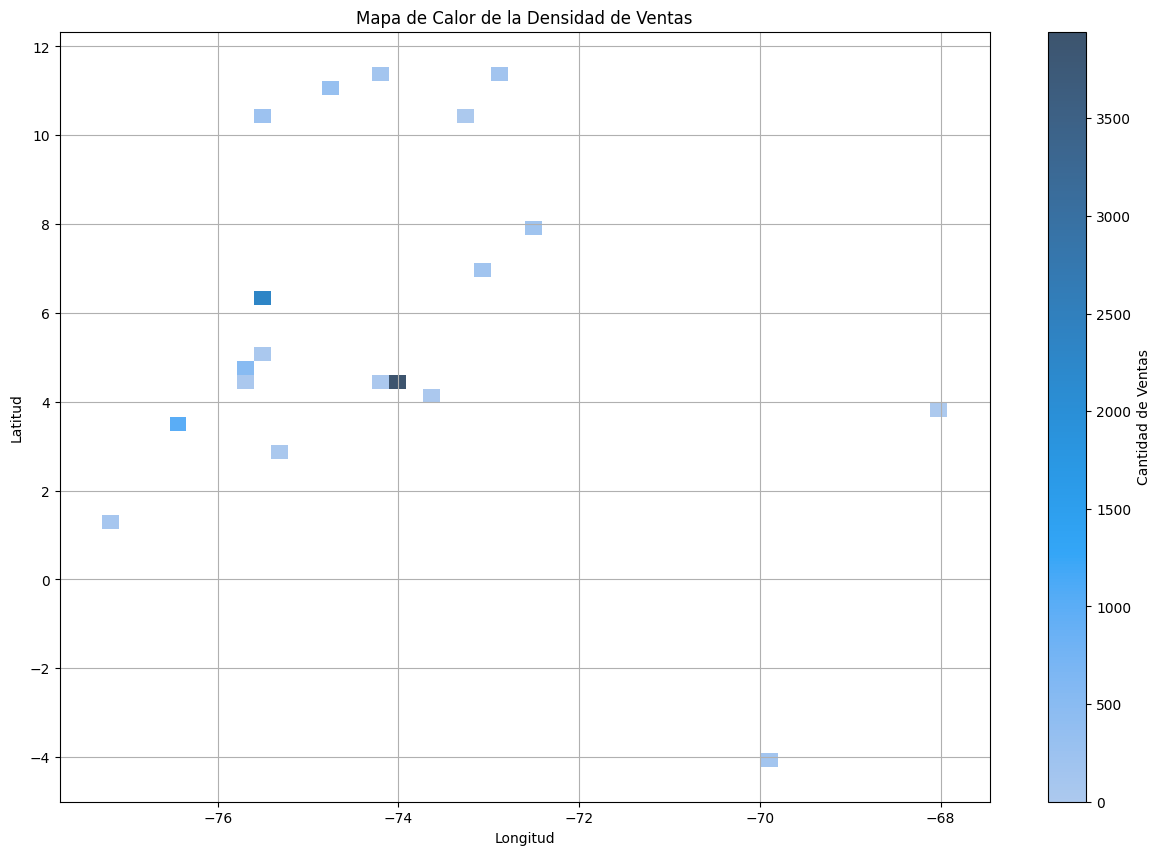

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el mapa de calor utilizando un 2D histograma
plt.figure(figsize=(15, 10))
sns.histplot(
    data=tiendas_unidas,
    x='lon',
    y='lat',
    bins=50,
    cbar=True,
    cbar_kws={'label': 'Cantidad de Ventas'}
)

plt.title('Mapa de Calor de la Densidad de Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()